<h1><center>Use of Artificial Intelligence </center></h1>
<h2><center>in PharmacoVigilance for Social Networking sites</center></h2>

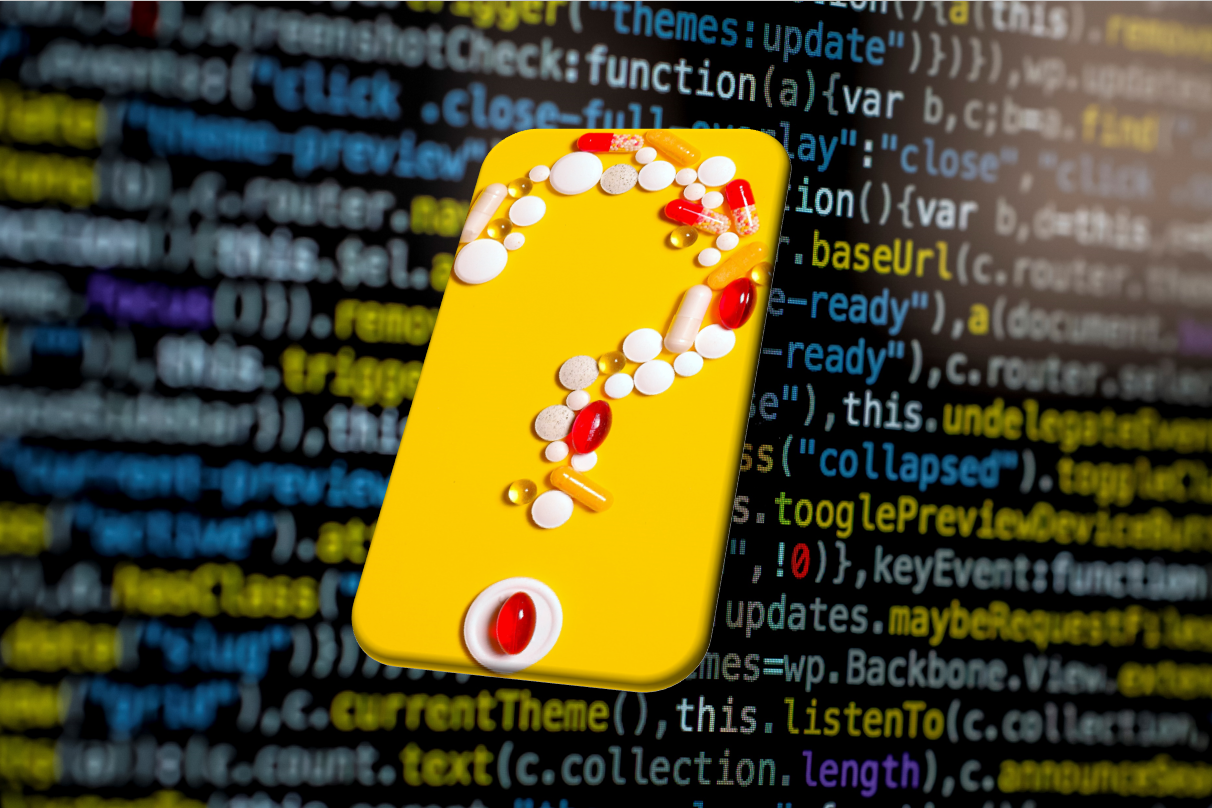
*- Photo by Anna Shvets from Pexels*

# Import All the required Libraries 

In [6]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from textblob import TextBlob
from textblob import Word

# Load the data

**From Where:**
Twitter allows the access of tweets from different users or hastags to it's developer community through their site https://developer.twitter.com/<br>
    We are planning to use this facility from Tweeter to extract data related to a given Drug
    
For this project, we are utilising the already extracted data for the Drugs like "**Adderall**" etc which goes by the generic name of "**amphetamine and dextroamphetamine**"



In [7]:
data = pd.read_csv("AHDH.csv", sep=",")
data.head()

,Unnamed: 0,Brand Name,ID_Drug,Generic Name,Review,Rating,Unnamed: 6
0,1,Adderall,1,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a...",10,NaN
1,2,Adderall,1,amphetamine and dextroamphetamine,"""I'm a 31yr old female, 5'4, 115lbs. I was 1st...",9,NaN
2,3,Adderall,1,amphetamine and dextroamphetamine,"""This drug was prescribed to after ritilin did...",7,NaN
3,4,Adderall,1,amphetamine and dextroamphetamine,"""My face breaks out in itchy blotchy spots and...",7,NaN
4,5,Adderall,1,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So...",10,NaN


In [8]:
data.shape

(1231, 7)

# Data cleanup

##### Remove unwanted columns

In [9]:
data.drop(['Unnamed: 6', 'Unnamed: 0', 'Rating'],axis=1, inplace=True)
data.head()

,Brand Name,ID_Drug,Generic Name,Review
0,Adderall,1,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a..."
1,Adderall,1,amphetamine and dextroamphetamine,"""I'm a 31yr old female, 5'4, 115lbs. I was 1st..."
2,Adderall,1,amphetamine and dextroamphetamine,"""This drug was prescribed to after ritilin did..."
3,Adderall,1,amphetamine and dextroamphetamine,"""My face breaks out in itchy blotchy spots and..."
4,Adderall,1,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So..."


In [10]:
data.shape

(1231, 4)

##### Check for Null Data

In [11]:
data['Review'].isnull().sum()

0

In [12]:
# new_data = data[data['Review'].notna()]
# new_data.shape

In [13]:
# data = new_data
# data['Review'].isnull().sum()

##### Check of spaces in column headline - using enumerate

In [14]:
spaces = []
for i, x in enumerate(data['Review']):
    if type(x) == str:
        if x.isspace():
            spaces.append(i)
        
print(len(spaces), 'spaces in index: ', spaces)

0 spaces in index:  []


In [15]:
data.shape

(1231, 4)

In [16]:
data.head()

,Brand Name,ID_Drug,Generic Name,Review
0,Adderall,1,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a..."
1,Adderall,1,amphetamine and dextroamphetamine,"""I'm a 31yr old female, 5'4, 115lbs. I was 1st..."
2,Adderall,1,amphetamine and dextroamphetamine,"""This drug was prescribed to after ritilin did..."
3,Adderall,1,amphetamine and dextroamphetamine,"""My face breaks out in itchy blotchy spots and..."
4,Adderall,1,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So..."


##### Remove tweets with duplicate text

In [17]:
data.drop_duplicates('Review', inplace=True)
data.reset_index(drop = True, inplace=True)

# Data Visualization

In [18]:
data.shape

(1231, 4)

In [19]:
# Count each Brand occurance in the data
brand_data = data['Brand Name'].value_counts()

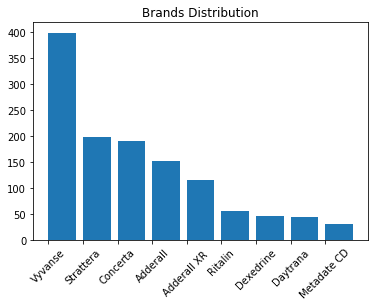

<Figure size 2400x1760 with 0 Axes>

In [20]:
#Visualizing the spread of Brands
plt.bar(brand_data.index, brand_data.values, align='edge')
plt.xticks(rotation=45)
plt.title('Brands Distribution')
plt.figure(figsize=(30,22), dpi=80)
plt.show()

In [21]:
brand_data.values

array([399, 198, 190, 152, 116,  55,  46,  44,  31], dtype=int64)

In [40]:
brand_data.index

Index(['Vyvanse', 'Strattera', 'Concerta', 'Adderall', 'Adderall XR ',
       'Ritalin', 'Dexedrine', 'Daytrana', 'Metadate CD'],
      dtype='object')

[Text(0, 0, 'Vyvanse'),
 Text(0, 0, 'Strattera'),
 Text(0, 0, 'Concerta'),
 Text(0, 0, 'Adderall'),
 Text(0, 0, 'Adderall XR\xa0'),
 Text(0, 0, 'Ritalin'),
 Text(0, 0, 'Dexedrine'),
 Text(0, 0, 'Daytrana'),
 Text(0, 0, 'Metadate CD')]

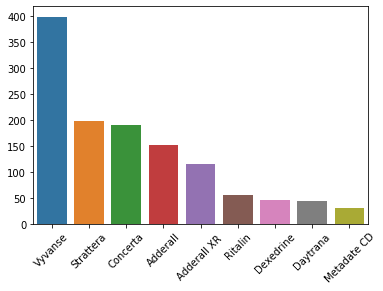

In [38]:
chart = sns.barplot(x=brand_data.index, y=brand_data.values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

# Sentiment Analysis

Next step is to identify reviews that may have any Adverse Events reported. This is the very core of this project. These are typically any side effects that the customer is not happy with<br>
  We may use Sentiment Analysis algorithm to identify such reporting, which can be further used to extract Event related information to be used for reporting to regulatory authorities 

**What is Sentiment Analysis:**

Sentiment analysis (also known as opinion mining or emotion AI) refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information
    A basic task in sentiment analysis is classifying the polarity of a given text at the document, sentence, or feature/aspect level—whether the expressed opinion is *positive, negative, or neutral*. For instance, at emotional states such as "angry", "sad", and "happy".
    
https://en.wikipedia.org/wiki/Sentiment_analysis

**Sentiment Analysis with TextBlob:**

TextBlob aims to provide access to common text-processing operations through a familiar interface. You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing.
    The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

https://textblob.readthedocs.io/en/dev/quickstart.html

##### Let's check the Sentiment Polarity of the reviews & Subjectivity of respective Sentiments

In [6]:
reviews = data["Review"]

for i in range(0,len(reviews)):
    reviewsBlob = TextBlob(reviews[i])
    sentiment = reviewsBlob.sentiment.polarity
    subjectivity = reviewsBlob.sentiment.subjectivity
    data.set_value(i, 'Sentiment', sentiment)
    if sentiment < -0.00:
        SentimentClass = 'Negative'
        data.set_value(i, 'SentimentClass', SentimentClass )
    elif sentiment > 0.15:
        SentimentClass = 'Positive'
        data.set_value(i, 'SentimentClass', SentimentClass )
    else:
        SentimentClass = 'Neutral'
        data.set_value(i, 'SentimentClass', SentimentClass )
        
    data.set_value(i, 'Subjectivity', subjectivity)
    if subjectivity < 0.45:
        SubjecivityClass = 'Objective'
        data.set_value(i, 'SubjecivityClass', SubjecivityClass )
    elif sentiment > 0.55:
        SubjecivityClass = 'Subjective'
        data.set_value(i, 'SubjecivityClass', SubjecivityClass )
    else:
        SubjecivityClass = 'Neutral'
        data.set_value(i, 'SubjecivityClass', SubjecivityClass )
        
data.head()

C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site

,Brand Name,ID_Drug,Generic Name,Review,Rating,Sentiment,SentimentClass,Subjectivity,SubjecivityClass
0,Adderall,1,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a...",10,-0.043333,Negative,0.487778,Neutral
1,Adderall,1,amphetamine and dextroamphetamine,"""I'm a 31yr old female, 5'4, 115lbs. I was 1st...",9,0.116406,Neutral,0.439583,Objective
2,Adderall,1,amphetamine and dextroamphetamine,"""This drug was prescribed to after ritilin did...",7,0.286616,Positive,0.495202,Neutral
3,Adderall,1,amphetamine and dextroamphetamine,"""My face breaks out in itchy blotchy spots and...",7,0.000000,Neutral,0.000000,Objective
4,Adderall,1,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So...",10,-0.032143,Negative,0.411820,Objective


In [7]:
data['SentimentClass'].value_counts()

Positive    500
Neutral     466
Negative    265
Name: SentimentClass, dtype: int64

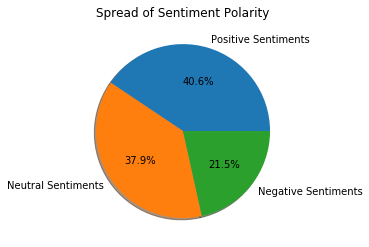

In [8]:
#Visualizing the spread of Sentiments
review_data = data['SentimentClass'].value_counts()
plt.pie(review_data, autopct='%1.1f%%', shadow=True, labels=['Positive Sentiments','Neutral Sentiments', 'Negative Sentiments'])
plt.title('Spread of Sentiment Polarity');
plt.show()

In [9]:
data['SubjecivityClass'].value_counts()

Neutral       772
Objective     430
Subjective     29
Name: SubjecivityClass, dtype: int64

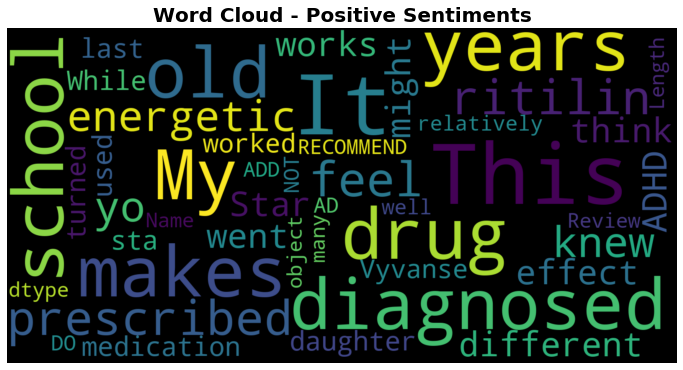

In [31]:
#Word cloud of Positive Sentiments
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(data[data['SentimentClass']=='Positive']['Review']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Positive Sentiments',fontsize=20,fontweight='bold')
plt.show()

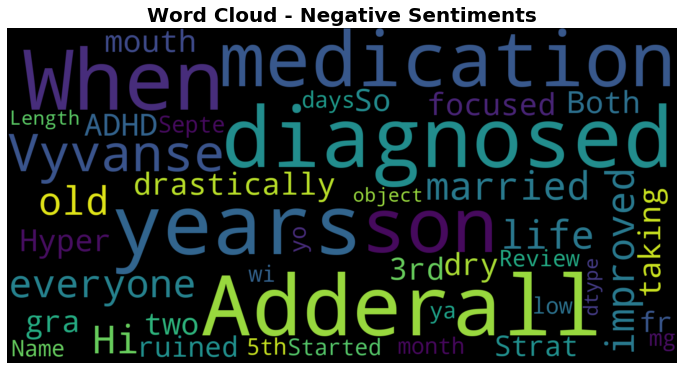

In [32]:
#Word cloud of Negative Sentiments
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(data[data['SentimentClass']=='Negative']['Review']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Negative Sentiments',fontsize=20,fontweight='bold')
plt.show()

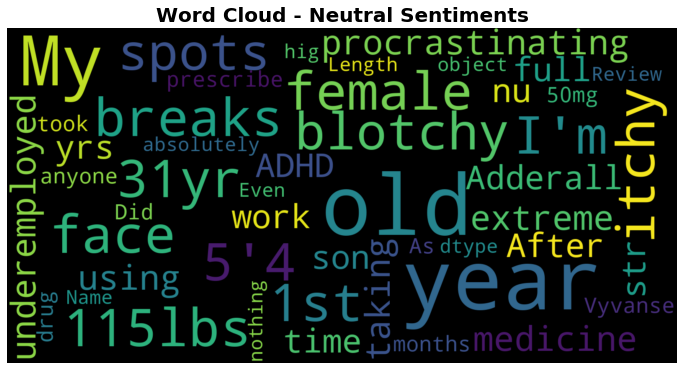

In [33]:
#Word cloud of Neutral Sentiments
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(data[data['SentimentClass']=='Neutral']['Review']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Neutral Sentiments',fontsize=20,fontweight='bold')
plt.show()

# Now select all the Reviews with Negative Polarity for further processing

In [10]:
adr_data = data[data['SentimentClass']=='Negative']
adr_data = adr_data[['Brand Name', 'Generic Name', 'Review']]
adr_data.head()

,Brand Name,Generic Name,Review
0,Adderall,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a..."
4,Adderall,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So..."
16,Adderall,amphetamine and dextroamphetamine,"""I have been taking Adderall for two years and..."
20,Adderall,amphetamine and dextroamphetamine,"""When I was diagnosed with ADHD in the 3rd gra..."
25,Adderall,amphetamine and dextroamphetamine,"""Hyper focused, dry mouth. Both this and Strat..."


In [11]:
adr_data.reset_index(inplace = True, drop = True) 
adr_data.head()

,Brand Name,Generic Name,Review
0,Adderall,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a..."
1,Adderall,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So..."
2,Adderall,amphetamine and dextroamphetamine,"""I have been taking Adderall for two years and..."
3,Adderall,amphetamine and dextroamphetamine,"""When I was diagnosed with ADHD in the 3rd gra..."
4,Adderall,amphetamine and dextroamphetamine,"""Hyper focused, dry mouth. Both this and Strat..."


# Extract Drug information from the Review comments

Drug related information form an important set of data that is required to be sent to regulatory authorities as a part of Adverse Event Reporting (ADR) <br>

We will use the **med7** package for this purpose<br>
This repository is a transferable clinical natural language processing model for electronic health records, compatible with spaCy, for clinical named-entity recognition (NER) tasks. The en_core_med7_lg model is trained on MIMIC-III free-text electronic health records and is able to recognise 7<br>
https://github.com/kormilitzin/med7

Various Categories/Lables that this package is able to extract are:
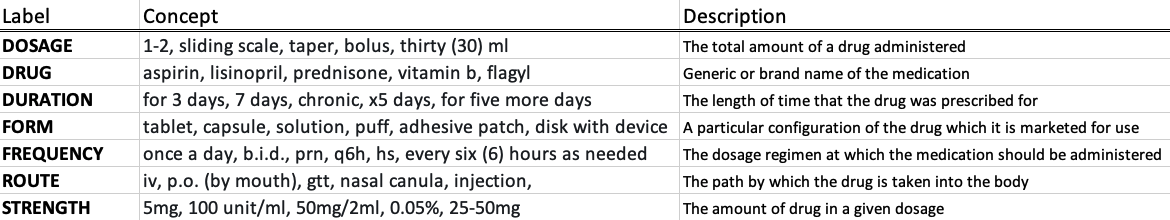

##### Let's see some sample extraction below:

In [12]:
import spacy
import en_core_med7_lg
import en_core_web_sm

# med7 = spacy.load("en_core_med7_lg")
med7 = en_core_med7_lg.load()

# nlp = en_core_web_sm.load()

# create distinct colours for labels
col_dict = {}
seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}

C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [19]:
text = "A patient was prescribed Magnesium hydroxide, aimovig & repatha 400mg/5ml suspension PO of total 30ml bid for the next 5 days."

# text = adr_data['Review'][0]

doc = med7(text)

spacy.displacy.render(doc, style='ent', jupyter=True, options=options)

In [20]:
drug_detail = [(ent.label_, ent.text) for ent in doc.ents]
drug_detail

[('DRUG', 'Magnesium hydroxide'),
 ('DRUG', 'aimovig'),
 ('DRUG', 'repatha'),
 ('DOSAGE', '400mg/5ml'),
 ('FORM', 'suspension'),
 ('ROUTE', 'PO'),
 ('DOSAGE', '30ml'),
 ('FREQUENCY', 'bid'),
 ('DURATION', 'for the next 5 days')]

In [135]:
adr_data = adr_data.astype('object')
reviews = adr_data['Review']

for i in range(0,len(reviews)):
    doc = med7(reviews[i])
    drug_detail = [(ent.label_, ent.text) for ent in doc.ents]
    adr_data.set_value(i, 'Drug Detail', drug_detail)

C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [136]:
adr_data.head()

,Brand Name,Generic Name,Review,Drug Detail
0,Adderall,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a...","[(DRUG, adderall), (STRENGTH, 30mg), (ROUTE, I..."
1,Adderall,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So...","[(DRUG, Adderall)]"
2,Adderall,amphetamine and dextroamphetamine,"""I have been taking Adderall for two years and...","[(DRUG, Adderall), (DURATION, for two years), ..."
3,Adderall,amphetamine and dextroamphetamine,"""When I was diagnosed with ADHD in the 3rd gra...","[(DRUG, Adderall), (DRUG, Adderall)]"
4,Adderall,amphetamine and dextroamphetamine,"""Hyper focused, dry mouth. Both this and Strat...","[(DRUG, Straterra), (DRUG, Depakote), (STRENGT..."


In [151]:
adr_data['Drug Detail'][25]

[('DRUG', 'Adderall'),
 ('DRUG', 'Zoloft'),
 ('DRUG', 'Adderall'),
 ('DRUG', 'Zoloft'),
 ('DRUG', 'Adderall')]

In [138]:
type(adr_data)

pandas.core.frame.DataFrame

# Extract Person detail

In [154]:
import en_core_web_md
nlp = en_core_web_md.load()

In [156]:
from spacy.tokens import Span
import dateparser

def expand_person_entities(doc):
    new_ents = []
    for ent in doc.ents:
        # Only check for title if it's a person and not the first token
        if ent.label_ == "PERSON":
            if ent.start != 0:
                # if person preceded by title, include title in entity
                prev_token = doc[ent.start - 1]
                if prev_token.text in ("Dr", "Dr.", "Mr", "Mr.", "Ms", "Ms."):
                    new_ent = Span(doc, ent.start - 1, ent.end, label=ent.label)
                    new_ents.append(new_ent)
                else:
                    # if entity can be parsed as a date, it's not a person
                    if dateparser.parse(ent.text) is None:
                        new_ents.append(ent) 
        else:
            new_ents.append(ent)
    doc.ents = new_ents
    return doc

# Add the component after the named entity recognizer
# nlp.remove_pipe('expand_person_entities')
nlp.add_pipe(expand_person_entities, after='ner')

doc = nlp(adr_data['Review'][0])
[(ent.text, ent.label_) for ent in doc.ents if ent.label_=='PERSON']

[]

In [160]:
doc = nlp(adr_data['Review'][3])
[(ent.text, ent.label_) for ent in doc.ents if ent.label_=='EVENT']

[]

In [161]:
import random 
from nltk.corpus import names 
import nltk 
  
def gender_features(word): 
    return {'last_letter':word[-1]} 
  
# preparing a list of examples and corresponding class labels. 
labeled_names = ([(name, 'male') for name in names.words('male.txt')]+
             [(name, 'female') for name in names.words('female.txt')]) 
  
random.shuffle(labeled_names) 
  
# we use the feature extractor to process the names data. 
featuresets = [(gender_features(n), gender)  
               for (n, gender)in labeled_names] 
  
# Divide the resulting list of feature 
# sets into a training set and a test set. 
train_set, test_set = featuresets[500:], featuresets[:500] 
  
# The training set is used to  
# train a new "naive Bayes" classifier. 
classifier = nltk.NaiveBayesClassifier.train(train_set) 


male
0.7615529285330468


In [183]:
text = adr_data['Review'][4]
text = 'she is mad'

In [184]:
print(classifier.classify(gender_features(text)))

male
